In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from tqdm.autonotebook import tqdm as tqdm

In [2]:
torch.cuda.is_available()

False

In [3]:
df_raw = pd.read_csv("wdbc.csv", header=None)

df_raw

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
y = pd.get_dummies(df_raw.iloc[:,1])
y = y.values
y

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [0, 1],
       [0, 1],
       [1, 0]], dtype=uint8)

In [5]:
x = df_raw.iloc[:,2:]
x = (x - x.min()) / (x.max() - x.min())
x = x.values
x

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [6]:
x[0]

array([0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.59375282,
       0.7920373 , 0.70313964, 0.73111332, 0.68636364, 0.60551811,
       0.35614702, 0.12046941, 0.3690336 , 0.27381126, 0.15929565,
       0.35139844, 0.13568182, 0.30062512, 0.31164518, 0.18304244,
       0.62077552, 0.14152452, 0.66831017, 0.45069799, 0.60113584,
       0.61929156, 0.56861022, 0.91202749, 0.59846245, 0.41886396])

In [7]:
y[0]

array([0, 1], dtype=uint8)

In [8]:
x.shape

(569, 30)

In [9]:
df_cleaned = np.column_stack([x,y])
df_cleaned.shape

(569, 32)

In [10]:
df_cleaned[0]

array([0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.59375282,
       0.7920373 , 0.70313964, 0.73111332, 0.68636364, 0.60551811,
       0.35614702, 0.12046941, 0.3690336 , 0.27381126, 0.15929565,
       0.35139844, 0.13568182, 0.30062512, 0.31164518, 0.18304244,
       0.62077552, 0.14152452, 0.66831017, 0.45069799, 0.60113584,
       0.61929156, 0.56861022, 0.91202749, 0.59846245, 0.41886396,
       0.        , 1.        ])

In [11]:
df_full_train, df_test = train_test_split(df_cleaned, test_size=0.1, random_state=1, shuffle=True)

x_train = df_full_train[:,:-2]
x_train = torch.Tensor(x_train)

y_train = df_full_train[:,-2:]
y_train = torch.Tensor(y_train)

x_test = df_test[:,:-2]
y_test = df_test[:,-2:]

In [12]:
y_train.shape

torch.Size([512, 2])

In [13]:
class NeuralNetwork(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        
        self.hidden_layer_1 = nn.Linear(self.in_dim, 20) # input to first hidden layer
        self.hidden_layer_2 = nn.Linear(20, 10)
        self.hidden_layer_3 = nn.Linear(10,5)
        self.hidden_layer_4 = nn.Linear(5,3)
        self.hidden_layer_5 = nn.Linear(3,2)

        """
        self.multiple_layers = nn.Sequential(
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
            nn.Linear(10, 10),
            nn.Sigmoid(),
        )
        """
        
        self.output_layer = nn.Linear(2, self.out_dim)
        self.activation = nn.Sigmoid()
    
    def forward(self, x):
        x = self.activation(self.hidden_layer_1(x))
        
        x = self.activation(self.hidden_layer_2(x))
        
        #x = self.multiple_layers(x)

        x = self.activation(self.hidden_layer_3(x))
    
        x = self.activation(self.hidden_layer_4(x))
        
        x = self.activation(self.hidden_layer_5(x))
        
        y = self.activation(self.output_layer(x))
        
        return y

In [14]:
model = NeuralNetwork(30, 2)

# Test structure of model
#predictions_before = model.forward(torch.Tensor(x_test).float())
#predictions_before

In [15]:
learning_rate = 0.001
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
batch_size = 5

In [16]:
# Custom dataset to treat how the model picks an x, y combination from the dataset
class MyCustomDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __len__(self):
        return len(self.x)
    
    # Requires you to return data as a pair of _x, _y
    def __getitem__(self, index):
        return self.x[index], self.y[index]

In [17]:
# Define the training process
# Each call of the train function == 1 Epoch
def train_fn(loader, model, optimizer, loss_fn, batch_size):
    loop = tqdm(loader)
    
    count = 0
    ave_loss = 0.00
    
    # Loop per batch
    for batch_idx, (data, targets) in enumerate(loop):
        predictions = model.forward(data)
        
        loss = loss_fn(predictions, targets)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        loop.set_postfix(loss=loss.item())
        
        ave_loss += loss.item()
        count += 1
        
    ave_loss = ave_loss / count
    
    return ave_loss

# Dataloader is in charge of:
# - partitioning data into batches
# - optionally shuffling the data
# - run the optimizer against a partition defined by this loader
custom_dataset = MyCustomDataset(x=x_train, y=y_train)

train_loader = DataLoader(
    custom_dataset,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False
)

epochs = 100
losses = []

for epoch in range(epochs):
    print("Epoch: {}".format(epoch))
    
    ave_loss = train_fn(
        train_loader,
        model,
        optimizer,
        loss_fn,
        batch_size
    )
    
    losses.append(ave_loss)
    
    print("Ave Loss: {}".format(ave_loss))
    
state = { 'state_dict': model.state_dict() }

torch.save(state, "neural.pth")

Epoch: 0


100%|██████████| 103/103 [00:00<00:00, 167.57it/s, loss=0.117]


Ave Loss: 0.23341967975630343
Epoch: 1


100%|██████████| 103/103 [00:00<00:00, 124.36it/s, loss=0.121]


Ave Loss: 0.23300808791107344
Epoch: 2


100%|██████████| 103/103 [00:00<00:00, 184.62it/s, loss=0.124]


Ave Loss: 0.23274261728652473
Epoch: 3


100%|██████████| 103/103 [00:00<00:00, 135.39it/s, loss=0.126]


Ave Loss: 0.23255938248148242
Epoch: 4


100%|██████████| 103/103 [00:00<00:00, 187.43it/s, loss=0.128]


Ave Loss: 0.2324006862721397
Epoch: 5


100%|██████████| 103/103 [00:00<00:00, 136.56it/s, loss=0.13]


Ave Loss: 0.23217540386232358
Epoch: 6


100%|██████████| 103/103 [00:00<00:00, 172.28it/s, loss=0.13]


Ave Loss: 0.23174105396548522
Epoch: 7


100%|██████████| 103/103 [00:00<00:00, 136.85it/s, loss=0.13]


Ave Loss: 0.23094789061731505
Epoch: 8


100%|██████████| 103/103 [00:00<00:00, 132.09it/s, loss=0.129]


Ave Loss: 0.22968367494425726
Epoch: 9


100%|██████████| 103/103 [00:00<00:00, 130.44it/s, loss=0.127]


Ave Loss: 0.22781013183802076
Epoch: 10


100%|██████████| 103/103 [00:00<00:00, 172.12it/s, loss=0.124]


Ave Loss: 0.22509823435718573
Epoch: 11


100%|██████████| 103/103 [00:00<00:00, 129.16it/s, loss=0.119]


Ave Loss: 0.22114361446459316
Epoch: 12


100%|██████████| 103/103 [00:00<00:00, 163.94it/s, loss=0.113]


Ave Loss: 0.2152484689378044
Epoch: 13


100%|██████████| 103/103 [00:00<00:00, 143.11it/s, loss=0.107]


Ave Loss: 0.20661752019981736
Epoch: 14


100%|██████████| 103/103 [00:00<00:00, 125.68it/s, loss=0.099]


Ave Loss: 0.1950213406415819
Epoch: 15


100%|██████████| 103/103 [00:00<00:00, 120.00it/s, loss=0.0911]


Ave Loss: 0.18112015109328392
Epoch: 16


100%|██████████| 103/103 [00:00<00:00, 133.69it/s, loss=0.0833]


Ave Loss: 0.16610220870346698
Epoch: 17


100%|██████████| 103/103 [00:00<00:00, 117.59it/s, loss=0.0758]


Ave Loss: 0.15120238109121045
Epoch: 18


100%|██████████| 103/103 [00:00<00:00, 117.61it/s, loss=0.0689]


Ave Loss: 0.13725250134768996
Epoch: 19


100%|██████████| 103/103 [00:00<00:00, 183.77it/s, loss=0.0625]


Ave Loss: 0.12464344161517411
Epoch: 20


100%|██████████| 103/103 [00:00<00:00, 139.88it/s, loss=0.0569]


Ave Loss: 0.11346135548885586
Epoch: 21


100%|██████████| 103/103 [00:00<00:00, 185.35it/s, loss=0.0518]


Ave Loss: 0.10359966443869674
Epoch: 22


100%|██████████| 103/103 [00:00<00:00, 222.37it/s, loss=0.0472]


Ave Loss: 0.09487779966546493
Epoch: 23


100%|██████████| 103/103 [00:00<00:00, 125.44it/s, loss=0.0432]


Ave Loss: 0.08717286123812777
Epoch: 24


100%|██████████| 103/103 [00:00<00:00, 256.85it/s, loss=0.0395]


Ave Loss: 0.08043054136836413
Epoch: 25


100%|██████████| 103/103 [00:00<00:00, 222.90it/s, loss=0.0362]


Ave Loss: 0.07458901763396356
Epoch: 26


100%|██████████| 103/103 [00:00<00:00, 255.42it/s, loss=0.0333]


Ave Loss: 0.06952898164541976
Epoch: 27


100%|██████████| 103/103 [00:00<00:00, 144.53it/s, loss=0.0306]


Ave Loss: 0.06512314889543844
Epoch: 28


100%|██████████| 103/103 [00:00<00:00, 203.97it/s, loss=0.0282]


Ave Loss: 0.06127151895712302
Epoch: 29


100%|██████████| 103/103 [00:00<00:00, 216.88it/s, loss=0.0261]


Ave Loss: 0.057897767359481274
Epoch: 30


100%|██████████| 103/103 [00:00<00:00, 247.97it/s, loss=0.0242]


Ave Loss: 0.05493784540341896
Epoch: 31


100%|██████████| 103/103 [00:00<00:00, 172.38it/s, loss=0.0224]


Ave Loss: 0.052330796127614466
Epoch: 32


100%|██████████| 103/103 [00:00<00:00, 145.56it/s, loss=0.0209]


Ave Loss: 0.050022851675748825
Epoch: 33


100%|██████████| 103/103 [00:00<00:00, 196.30it/s, loss=0.0195]


Ave Loss: 0.04798378567527799
Epoch: 34


100%|██████████| 103/103 [00:00<00:00, 183.61it/s, loss=0.0182]


Ave Loss: 0.04620164479083807
Epoch: 35


100%|██████████| 103/103 [00:00<00:00, 226.94it/s, loss=0.017]


Ave Loss: 0.04463969570702141
Epoch: 36


100%|██████████| 103/103 [00:00<00:00, 262.54it/s, loss=0.016]


Ave Loss: 0.04321343847776501
Epoch: 37


100%|██████████| 103/103 [00:00<00:00, 235.78it/s, loss=0.015]


Ave Loss: 0.04180915692586054
Epoch: 38


100%|██████████| 103/103 [00:00<00:00, 209.12it/s, loss=0.0141]


Ave Loss: 0.040348413490771666
Epoch: 39


100%|██████████| 103/103 [00:00<00:00, 131.00it/s, loss=0.0133]


Ave Loss: 0.0388829167389754
Epoch: 40


100%|██████████| 103/103 [00:00<00:00, 176.12it/s, loss=0.0125]


Ave Loss: 0.03755352324218426
Epoch: 41


100%|██████████| 103/103 [00:00<00:00, 207.52it/s, loss=0.0117]


Ave Loss: 0.03640169562609161
Epoch: 42


100%|██████████| 103/103 [00:00<00:00, 162.48it/s, loss=0.011]


Ave Loss: 0.03537705247697321
Epoch: 43


100%|██████████| 103/103 [00:00<00:00, 155.24it/s, loss=0.0104]


Ave Loss: 0.034442919252205245
Epoch: 44


100%|██████████| 103/103 [00:00<00:00, 124.57it/s, loss=0.0098]


Ave Loss: 0.033581261486900084
Epoch: 45


100%|██████████| 103/103 [00:00<00:00, 123.51it/s, loss=0.00924]


Ave Loss: 0.03284624114958117
Epoch: 46


100%|██████████| 103/103 [00:00<00:00, 121.23it/s, loss=0.00872]


Ave Loss: 0.03233635278183569
Epoch: 47


100%|██████████| 103/103 [00:00<00:00, 127.22it/s, loss=0.00823]


Ave Loss: 0.031974067368987696
Epoch: 48


100%|██████████| 103/103 [00:00<00:00, 139.29it/s, loss=0.00779]


Ave Loss: 0.03141074018661403
Epoch: 49


100%|██████████| 103/103 [00:00<00:00, 125.62it/s, loss=0.00738]


Ave Loss: 0.030731867827041057
Epoch: 50


100%|██████████| 103/103 [00:00<00:00, 128.46it/s, loss=0.007] 


Ave Loss: 0.030072812235109436
Epoch: 51


100%|██████████| 103/103 [00:00<00:00, 131.09it/s, loss=0.00666]


Ave Loss: 0.02925911097724027
Epoch: 52


100%|██████████| 103/103 [00:00<00:00, 144.75it/s, loss=0.00634]


Ave Loss: 0.028251059353351593
Epoch: 53


100%|██████████| 103/103 [00:00<00:00, 157.35it/s, loss=0.006] 


Ave Loss: 0.02689757128924276
Epoch: 54


100%|██████████| 103/103 [00:00<00:00, 128.45it/s, loss=0.00569]


Ave Loss: 0.02598826382399618
Epoch: 55


100%|██████████| 103/103 [00:00<00:00, 120.81it/s, loss=0.0054]


Ave Loss: 0.02532033247927439
Epoch: 56


100%|██████████| 103/103 [00:00<00:00, 143.91it/s, loss=0.00514]


Ave Loss: 0.024697493906449347
Epoch: 57


100%|██████████| 103/103 [00:00<00:00, 128.98it/s, loss=0.0049] 


Ave Loss: 0.02411461744041553
Epoch: 58


100%|██████████| 103/103 [00:00<00:00, 141.01it/s, loss=0.00468]


Ave Loss: 0.023615718746865258
Epoch: 59


100%|██████████| 103/103 [00:00<00:00, 146.09it/s, loss=0.00448]


Ave Loss: 0.023265875618253808
Epoch: 60


100%|██████████| 103/103 [00:00<00:00, 123.02it/s, loss=0.00429]


Ave Loss: 0.023110208942473513
Epoch: 61


100%|██████████| 103/103 [00:00<00:00, 163.08it/s, loss=0.0041]


Ave Loss: 0.02281736952786162
Epoch: 62


100%|██████████| 103/103 [00:00<00:00, 148.99it/s, loss=0.00393]


Ave Loss: 0.022247609162468065
Epoch: 63


100%|██████████| 103/103 [00:00<00:00, 162.84it/s, loss=0.00376]


Ave Loss: 0.021627485526056544
Epoch: 64


100%|██████████| 103/103 [00:00<00:00, 180.03it/s, loss=0.00361]


Ave Loss: 0.021120131831815086
Epoch: 65


100%|██████████| 103/103 [00:00<00:00, 130.72it/s, loss=0.00347]


Ave Loss: 0.020721044447905953
Epoch: 66


100%|██████████| 103/103 [00:00<00:00, 136.56it/s, loss=0.00334]


Ave Loss: 0.02039952875223481
Epoch: 67


100%|██████████| 103/103 [00:00<00:00, 211.22it/s, loss=0.00321]


Ave Loss: 0.020125878762309122
Epoch: 68


100%|██████████| 103/103 [00:00<00:00, 280.00it/s, loss=0.0031]


Ave Loss: 0.019895077814140075
Epoch: 69


100%|██████████| 103/103 [00:00<00:00, 274.05it/s, loss=0.00299]


Ave Loss: 0.019757197894047476
Epoch: 70


100%|██████████| 103/103 [00:00<00:00, 306.68it/s, loss=0.0029]


Ave Loss: 0.019845549731506307
Epoch: 71


100%|██████████| 103/103 [00:00<00:00, 306.68it/s, loss=0.00281]


Ave Loss: 0.019655081079549438
Epoch: 72


100%|██████████| 103/103 [00:00<00:00, 203.34it/s, loss=0.00271]


Ave Loss: 0.018016912978938194
Epoch: 73


100%|██████████| 103/103 [00:00<00:00, 195.26it/s, loss=0.00261]


Ave Loss: 0.01693457515584757
Epoch: 74


100%|██████████| 103/103 [00:00<00:00, 202.83it/s, loss=0.00251]


Ave Loss: 0.01637023515791352
Epoch: 75


100%|██████████| 103/103 [00:00<00:00, 193.02it/s, loss=0.00242]


Ave Loss: 0.01591900971862804
Epoch: 76


100%|██████████| 103/103 [00:00<00:00, 206.15it/s, loss=0.00233]


Ave Loss: 0.015498125889492266
Epoch: 77


100%|██████████| 103/103 [00:00<00:00, 132.48it/s, loss=0.00225]


Ave Loss: 0.01513799445622248
Epoch: 78


100%|██████████| 103/103 [00:00<00:00, 166.41it/s, loss=0.00217]


Ave Loss: 0.014826046266746752
Epoch: 79


100%|██████████| 103/103 [00:00<00:00, 146.24it/s, loss=0.00209]


Ave Loss: 0.014555593821428065
Epoch: 80


100%|██████████| 103/103 [00:00<00:00, 127.18it/s, loss=0.00202]


Ave Loss: 0.014319963088638863
Epoch: 81


100%|██████████| 103/103 [00:00<00:00, 182.85it/s, loss=0.00195]


Ave Loss: 0.01411023241178431
Epoch: 82


100%|██████████| 103/103 [00:00<00:00, 128.18it/s, loss=0.00188]


Ave Loss: 0.01391956311971564
Epoch: 83


100%|██████████| 103/103 [00:00<00:00, 179.48it/s, loss=0.00182]


Ave Loss: 0.013743752242943037
Epoch: 84


100%|██████████| 103/103 [00:00<00:00, 138.27it/s, loss=0.00176]


Ave Loss: 0.013580172526134738
Epoch: 85


100%|██████████| 103/103 [00:00<00:00, 130.56it/s, loss=0.0017] 


Ave Loss: 0.013427062469842002
Epoch: 86


100%|██████████| 103/103 [00:00<00:00, 124.20it/s, loss=0.00164]


Ave Loss: 0.013283182924513895
Epoch: 87


100%|██████████| 103/103 [00:00<00:00, 123.15it/s, loss=0.00159]


Ave Loss: 0.013147632602728831
Epoch: 88


100%|██████████| 103/103 [00:00<00:00, 141.87it/s, loss=0.00154]


Ave Loss: 0.013019773522527546
Epoch: 89


100%|██████████| 103/103 [00:00<00:00, 124.68it/s, loss=0.00149]


Ave Loss: 0.012899197002836657
Epoch: 90


100%|██████████| 103/103 [00:00<00:00, 132.74it/s, loss=0.00144]


Ave Loss: 0.01278579396136937
Epoch: 91


100%|██████████| 103/103 [00:00<00:00, 120.70it/s, loss=0.0014]


Ave Loss: 0.012679817820718349
Epoch: 92


100%|██████████| 103/103 [00:00<00:00, 122.21it/s, loss=0.00135]


Ave Loss: 0.012581893699514924
Epoch: 93


100%|██████████| 103/103 [00:00<00:00, 124.83it/s, loss=0.00131]


Ave Loss: 0.012493022184059458
Epoch: 94


100%|██████████| 103/103 [00:00<00:00, 138.19it/s, loss=0.00128]


Ave Loss: 0.012414350984753698
Epoch: 95


100%|██████████| 103/103 [00:00<00:00, 133.26it/s, loss=0.00124]


Ave Loss: 0.012347162206141838
Epoch: 96


100%|██████████| 103/103 [00:00<00:00, 133.66it/s, loss=0.00121]


Ave Loss: 0.012293612245397949
Epoch: 97


100%|██████████| 103/103 [00:00<00:00, 151.89it/s, loss=0.00118]


Ave Loss: 0.012258439662739706
Epoch: 98


100%|██████████| 103/103 [00:00<00:00, 132.57it/s, loss=0.00115]


Ave Loss: 0.012249586875414819
Epoch: 99


100%|██████████| 103/103 [00:00<00:00, 159.31it/s, loss=0.00112]

Ave Loss: 0.01227575335968105


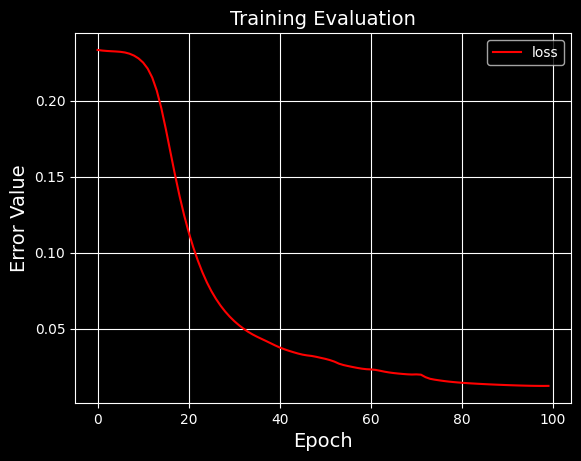

In [18]:
plt.plot(losses, label='loss', color='red')
plt.title('Training Evaluation', fontsize=14)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Error Value', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()

In [19]:
model = NeuralNetwork(30,2)
state = torch.load("neural.pth")
model.load_state_dict(state['state_dict'])

<All keys matched successfully>

In [20]:
predictions_after = model.forward(torch.Tensor(x_test))
predictions_after


tensor([[0.9462, 0.0550],
        [0.0364, 0.9627],
        [0.9669, 0.0339],
        [0.0362, 0.9628],
        [0.0646, 0.9338],
        [0.0363, 0.9628],
        [0.0362, 0.9629],
        [0.0367, 0.9624],
        [0.9669, 0.0339],
        [0.9664, 0.0344],
        [0.9669, 0.0339],
        [0.0363, 0.9627],
        [0.0362, 0.9628],
        [0.9669, 0.0339],
        [0.9637, 0.0372],
        [0.9664, 0.0344],
        [0.9669, 0.0339],
        [0.9669, 0.0339],
        [0.9669, 0.0339],
        [0.0362, 0.9629],
        [0.9669, 0.0339],
        [0.9669, 0.0339],
        [0.0362, 0.9629],
        [0.9668, 0.0340],
        [0.0363, 0.9628],
        [0.9668, 0.0340],
        [0.9661, 0.0348],
        [0.0362, 0.9629],
        [0.0362, 0.9629],
        [0.0363, 0.9627],
        [0.0362, 0.9629],
        [0.9669, 0.0339],
        [0.0362, 0.9629],
        [0.0365, 0.9625],
        [0.9669, 0.0339],
        [0.9669, 0.0339],
        [0.0363, 0.9627],
        [0.9665, 0.0343],
        [0.2

In [21]:
predictions_after = predictions_after.detach().cpu().numpy()
predictions_after

array([[0.946193  , 0.05503882],
       [0.03635376, 0.9626902 ],
       [0.96687317, 0.03392349],
       [0.03623933, 0.9628079 ],
       [0.06456017, 0.93384385],
       [0.03626219, 0.96278435],
       [0.03617806, 0.96287096],
       [0.03667143, 0.9623636 ],
       [0.9669213 , 0.03387399],
       [0.9664404 , 0.0343681 ],
       [0.96692497, 0.03387023],
       [0.03633336, 0.9627112 ],
       [0.03623956, 0.96280766],
       [0.96690434, 0.03389147],
       [0.96368045, 0.03719839],
       [0.96638787, 0.03442198],
       [0.9669248 , 0.03387049],
       [0.9668667 , 0.03393018],
       [0.9669115 , 0.03388411],
       [0.03618295, 0.9628659 ],
       [0.9669106 , 0.03388508],
       [0.966906  , 0.03388975],
       [0.03618021, 0.96286863],
       [0.9668453 , 0.03395214],
       [0.03625513, 0.9627916 ],
       [0.9667685 , 0.03403102],
       [0.96605307, 0.03476571],
       [0.03617909, 0.9628699 ],
       [0.03616513, 0.96288425],
       [0.03634254, 0.9627018 ],
       [0.

In [22]:
predictions_after = [[1, 0] if y_hat[0] > y_hat[1] else [0, 1] for y_hat in predictions_after]

In [23]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions_after)
accuracy

1.0

In [26]:
# Check the state of the model as a dictionary
print(model.state_dict())

OrderedDict([('hidden_layer_1.weight', tensor([[-2.7140e-01, -3.9316e-01, -3.8126e-01, -3.7650e-01,  1.2883e-01,
         -2.9276e-01, -8.1657e-01, -1.0394e+00,  1.7226e-01,  6.1949e-01,
         -1.0529e+00,  2.4266e-01, -8.9025e-01, -1.4528e+00, -1.9332e-01,
          4.5473e-01,  2.6774e-01, -5.7232e-02,  2.5533e-01,  7.8015e-01,
         -5.3263e-01, -4.4388e-01, -6.5477e-01, -7.9189e-01, -2.9452e-01,
         -2.9168e-01, -6.4822e-01, -5.5937e-01, -6.7073e-01, -2.0004e-01],
        [ 1.9325e-01,  3.3092e-01,  1.2365e-01,  2.7411e-01,  1.2271e-01,
          4.7349e-02,  6.9688e-01,  9.6546e-01, -9.8501e-02, -6.2251e-01,
          1.1466e+00, -3.6811e-01,  7.6384e-01,  1.5029e+00,  6.0171e-02,
         -2.7841e-01, -2.9457e-01,  2.1185e-01, -3.9798e-01, -4.6343e-01,
          5.1119e-01,  5.4949e-01,  3.8714e-01,  9.0562e-01,  3.0812e-01,
          3.4180e-01,  7.0320e-01,  6.1426e-01,  3.9408e-01,  5.5767e-02],
        [ 9.0239e-02,  3.3724e-01,  2.0252e-01,  2.8167e-01, -3.8638e-0

#### **End. Thank you!**